In [1]:
import pandas as pd

In [2]:
import datetime
from datetime import time as dt

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
import gc
gc.collect()

7

In [6]:
#mydatapath="yellow_tripdata_2018-01.csv"
#this function to read month's data
def data_aggregator(path,columnnumber,chunksize):
    df_list = []
    for chunk in pd.read_csv(path,usecols=columnnumber, chunksize=chunksize):
        df_list.append(pd.DataFrame(chunk).dropna())
    result = pd.concat(df_list)
    del df_list
    return result

In [7]:
JanData="yellow_tripdata_2018-01.csv"
FebData="yellow_tripdata_2018-02.csv"
MarData="yellow_tripdata_2018-03.csv"
AprData="yellow_tripdata_2018-04.csv"
MayData="yellow_tripdata_2018-05.csv"
JunData="yellow_tripdata_2018-06.csv"

In [8]:
MayDF=data_aggregator(MayData,[1,2,4],10000)

In [9]:
MayData=pd.DataFrame(columns=['pickup','dropoff','distance'])
MayData['pickup']=pd.to_datetime(MayDF['tpep_pickup_datetime'])
MayData['dropoff']=pd.to_datetime(MayDF['tpep_dropoff_datetime'])
MayData['distance']=MayDF['trip_distance']
MayDF=None
del MayDF

In [10]:
MayDuration=pd.DataFrame(columns=['Duration','Distance'])
MayDuration['Duration']=(MayData['dropoff']-MayData['pickup']).dt.seconds/60
MayDuration['Distance']=MayData['distance']
MayData=None
del MayData

In [12]:
MayDuration=MayDuration[MayDuration.Duration > 1.0]

In [13]:
MayDuration=MayDuration[MayDuration.Distance > 0.0]

In [14]:
JunDF=data_aggregator(JunData,[1,2,4],10000)

In [15]:
JunData=pd.DataFrame(columns=['pickup','dropoff','distance'])
JunData['pickup']=pd.to_datetime(JunDF['tpep_pickup_datetime'])
JunData['dropoff']=pd.to_datetime(JunDF['tpep_dropoff_datetime'])
JunData['distance']=JunDF['trip_distance']
JunDF=None
del JunDF

In [16]:
JunDuration=pd.DataFrame(columns=['Duration','Distance'])
JunDuration['Duration']=(JunData['dropoff']-JunData['pickup']).dt.seconds/60
JunDuration['Distance']=JunData['distance']
JunData=None
del JunData

In [17]:
JunDuration=JunDuration[JunDuration.Duration > 1]

In [18]:
JunDuration=JunDuration[JunDuration.Distance > 0.0]

In [19]:
FebDF=data_aggregator(FebData,[1,2,4],10000)

In [20]:
FebData=pd.DataFrame(columns=['pickup','dropoff','distance'])
FebData['pickup']=pd.to_datetime(FebDF['tpep_pickup_datetime'])
FebData['dropoff']=pd.to_datetime(FebDF['tpep_dropoff_datetime'])
FebData['distance']=FebDF['trip_distance']
FebDF=None
del FebDF

In [21]:
FebDuration=pd.DataFrame(columns=['Duration','Distance'])
FebDuration['Duration']=(FebData['dropoff']-FebData['pickup']).dt.seconds/60
FebDuration['Distance']=FebData['distance']

In [22]:
FebBoroghDF=None
del FebBoroghDF

In [24]:
FebDuration=FebDuration[FebDuration.Duration > 1]
FebDuration=FebDuration[FebDuration.Distance > 0]

In [26]:
MarDF=data_aggregator(MarData,[1,2,4],10000)

In [27]:
MarData=pd.DataFrame(columns=['pickup','dropoff','distance'])
MarData['pickup']=pd.to_datetime(MarDF['tpep_pickup_datetime'])
MarData['dropoff']=pd.to_datetime(MarDF['tpep_dropoff_datetime'])
MarData['distance']=MarDF['trip_distance']
MarDF=None
del MarDF

In [28]:
MarDuration=pd.DataFrame(columns=['Duration','Distance'])
MarDuration['Duration']=(MarData['dropoff']-MarData['pickup']).dt.seconds/60
MarDuration['Distance']=MarData['distance']
MarBoroghDF=None
del MarBoroghDF

In [29]:
MarDuration=MarDuration[MarDuration.Duration > 1]
MarDuration=MarDuration[MarDuration.Distance > 0]

In [30]:
AprDF=data_aggregator(AprData,[1,2,4],10000)

In [31]:
AprData=pd.DataFrame(columns=['pickup','dropoff','distance'])
AprData['pickup']=pd.to_datetime(AprDF['tpep_pickup_datetime'])
AprData['dropoff']=pd.to_datetime(AprDF['tpep_dropoff_datetime'])
AprData['distance']=AprDF['trip_distance']
AprDF=None
del AprDF

In [32]:
AprDuration=pd.DataFrame(columns=['Duration','Distance'])
AprDuration['Duration']=(AprData['dropoff']-AprData['pickup']).dt.seconds/60
AprDuration['Distance']=AprData['distance']
AprData=None
del AprData

In [33]:
AprDuration=AprDuration[AprDuration.Duration > 1]
AprDuration=AprDuration[AprDuration.Distance > 0]

In [34]:
JanDF=data_aggregator(JanData,[1,2,4],10000)

In [35]:
JanData=pd.DataFrame(columns=['pickup','dropoff','distance'])
JanData['pickup']=pd.to_datetime(JanDF['tpep_pickup_datetime'])
JanData['dropoff']=pd.to_datetime(JanDF['tpep_dropoff_datetime'])
JanData['distance']=JanDF['trip_distance']
JanDF=None
del JanDF

In [36]:
JanDuration=pd.DataFrame(columns=['Duration','Distance'])
JanDuration['Duration']=(JanData['dropoff']-JanData['pickup']).dt.seconds/60
JanDuration['Distance']=JanData['distance']
JanData=None
del JanData

In [37]:
JanDuration=JanDuration[JanDuration.Duration > 1]
JanDuration=JanDuration[JanDuration.Distance > 0]

In [38]:
FullData=pd.concat([JanDuration,FebDuration,MarDuration,AprDuration,MayDuration,JunDuration])

Text(0,0.5,'Distance')

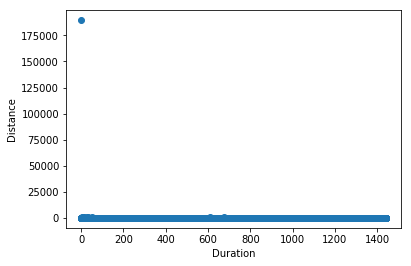

In [41]:
plt.scatter(FullData['Duration'],y=FullData['Distance'])
plt.xlabel('Duration')
plt.ylabel('Distance')

In [42]:
FullData=FullData[FullData.Distance < 500.0]

Text(0,0.5,'Distance')

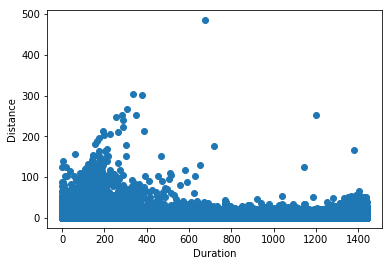

In [43]:
plt.scatter(FullData['Duration'],y=FullData['Distance'])
plt.xlabel('Duration')
plt.ylabel('Distance')

In [45]:
#From the plot we notice that there is an unrealistic data like the points that take more than 650 mins for a short distance.
FullData=FullData[FullData.Distance < 300.0]
FullData=FullData[FullData.Duration < 650.0]

Text(0,0.5,'Distance')

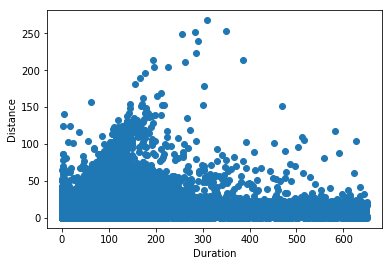

In [47]:
plt.scatter(FullData['Duration'],y=FullData['Distance'])
plt.xlabel('Duration')
plt.ylabel('Distance')

In [46]:
import numpy
numpy.corrcoef(FullData['Duration'], FullData['Distance'])[0, 1]

0.756650441677236

The Pearson Coefficient that we got after clenning the data is equal to 0.75 and that meaning there is a strong relationship between the distance and the duration and that is true in the real world.